# Analyzing the Cars Dataset

**Task:** To predict the price of the Car based on the various features.

**About:**
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

In [263]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [264]:
#importing the dataset
data = pd.read_csv('C:/Users/2211583/OneDrive - Cognizant/Datasets/CarPrice.csv')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [266]:
#Exploring the data
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [267]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [268]:
data['doornumber'].unique()
data['fuelsystem'].unique()
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [269]:
#Seperating the numeric and categorical variables
cat_data = data.select_dtypes('object')
num_data = data.iloc[:,1:].select_dtypes(['float64','int64'])
num_data.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

In [270]:
cat_data.head()

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi

In [271]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

**Checking for the missing values**

In [272]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

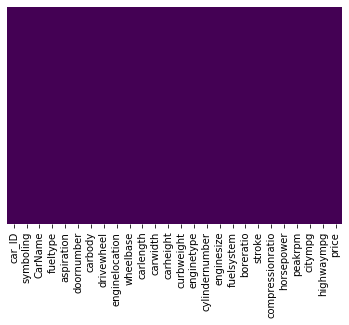

In [224]:
#Visualizing the same
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False,yticklabels = False )

**Conclusion:** There are no missing values in the data

 **Exploratory Data Analysis**

In [36]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [37]:
plt.figure(figsize = (8,5))
sns.countplot('carbody', hue = 'doornumber',data = data,palette = 'Spectral')
plt.legend(bbox_to_anchor =(0.99, 0.93))
plt.grid(ls = 'dashed',lw = 0.5)

**Conclusion:** It could be observed that 'convertable' and 'hardtop' cars have two doors and 'wagon' cars have four doors. For 'Sedan' most have four doors and 'hatchbacks' have two doors.

In [38]:
plt.figure(figsize = (8,5))
sns.countplot('carbody', hue = 'fueltype',data = data,palette = 'Spectral')
plt.grid(ls = 'dashed',lw = 0.5)

**Conclusion:** Most cars uses 'gas' as their fuel type.

In [39]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'price',x = 'fueltype',hue = 'carbody', data = data ,palette = 'Spectral')
plt.grid(ls = 'dashed',lw = 0.5)
plt.legend(bbox_to_anchor =(0.999, 0.8))

**Conclusion** 
1. It can be observed that 'deisel' is used as fuel in mostly 'sedan' and 'wagon' cars. And the median price of these cars are higher as compared to car with similar carbody but having fuel type 'Gas'.

2. The median price of convertable is higher as compared to cars with other body types,

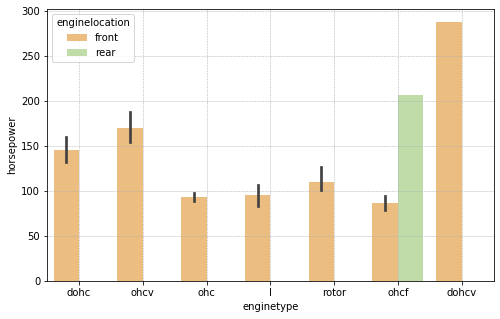

In [40]:
plt.figure(figsize = (8,5))
sns.barplot(x= 'enginetype',y = 'horsepower',hue = 'enginelocation', data = data,palette = 'Spectral')
plt.grid(ls = 'dashed',lw = 0.5)

**Conclusion:** 

1.The engine type 'dohcv' has the higest mean horse power.

2.For engine type 'ohcf' alone, engine placement is in the 'rear' end.

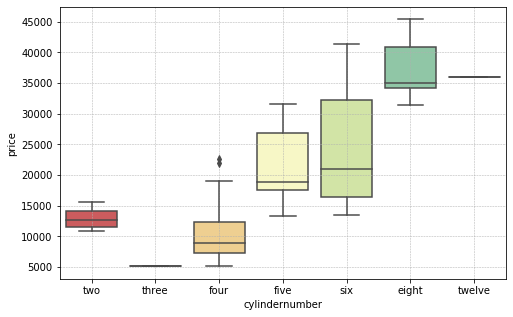

In [41]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'price',x = 'cylindernumber', order = ['two','three','four','five','six','eight','twelve'],data = data ,palette = 'Spectral')
plt.grid(ls = 'dashed',lw = 0.5)

**Conclusion:** A general trend could be observed that higher the number of cylinders, higher the median price of the cars.

<Figure size 720x432 with 0 Axes>

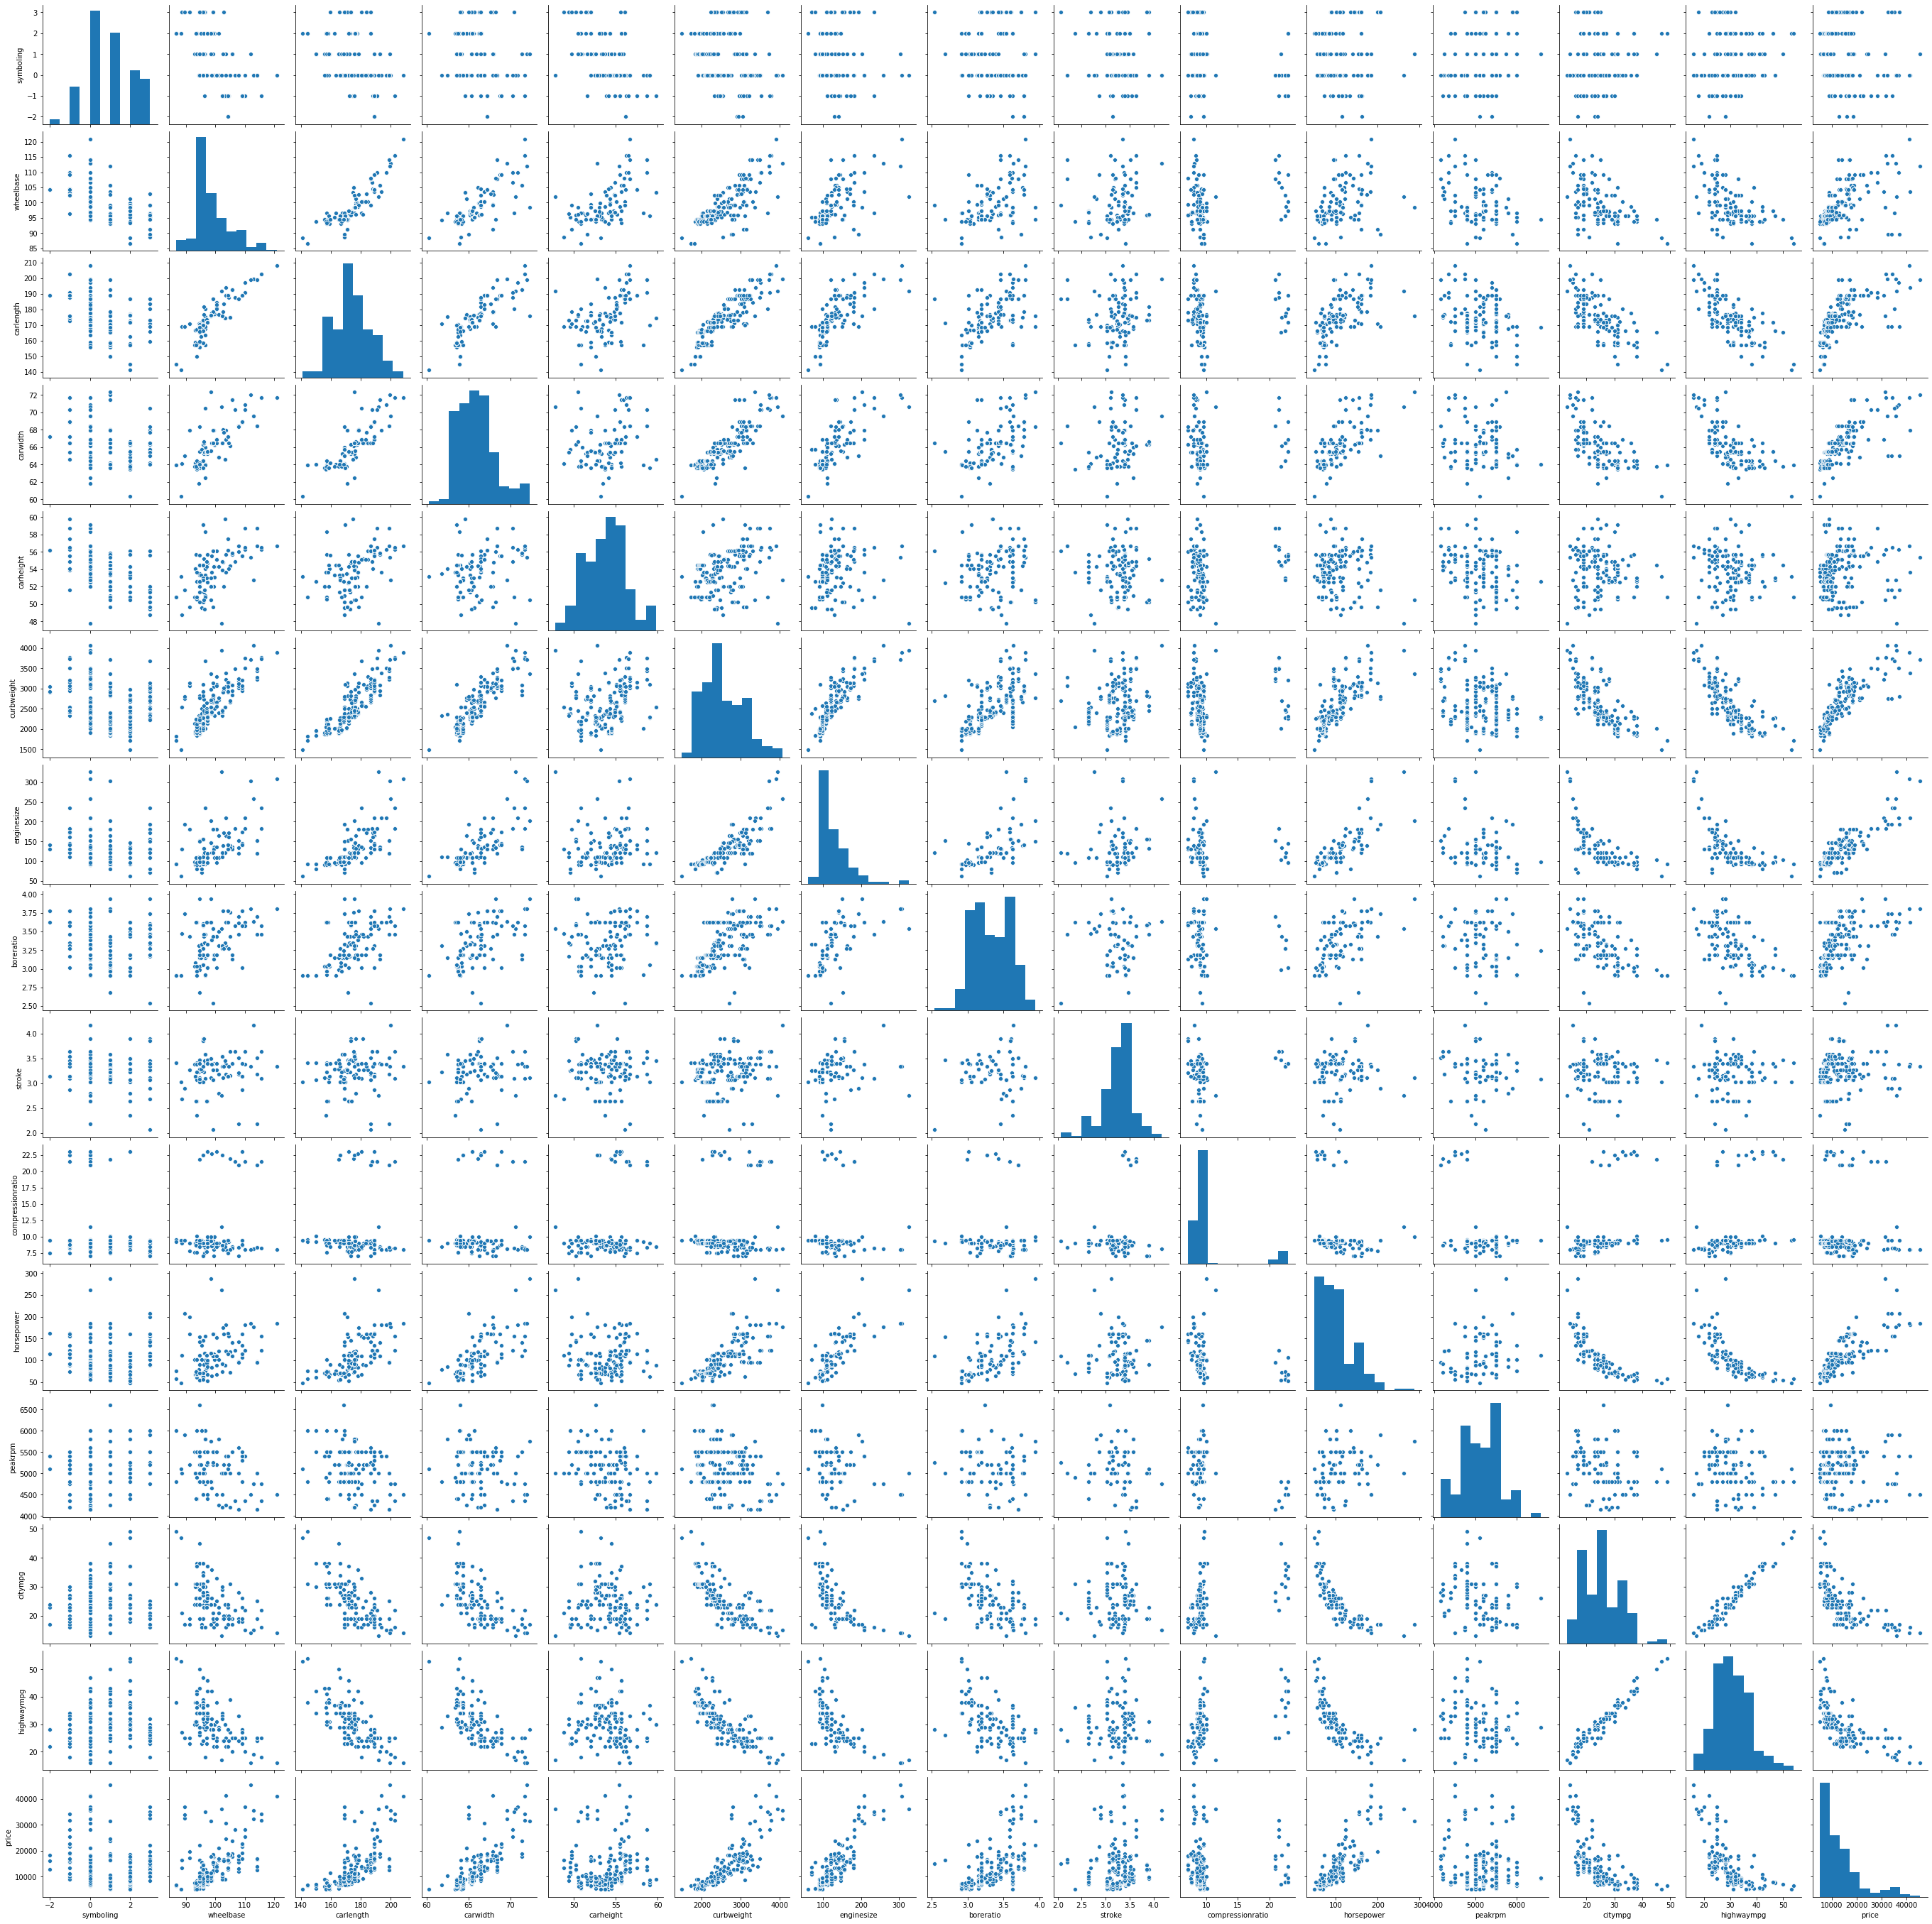

In [42]:
plt.figure(figsize = (10,6))
sns.pairplot(num_data)

**Obsevations:** 

    1. It could be observed that the price column is righly skewed.
    2. Most of the numerical variables have an almost linear relationship with our dependent variable 'Price'.
    3. There are about two variables ('symbolism' and 'compression') in the data, which have very few unique values. Converting the data type will be appropriate.

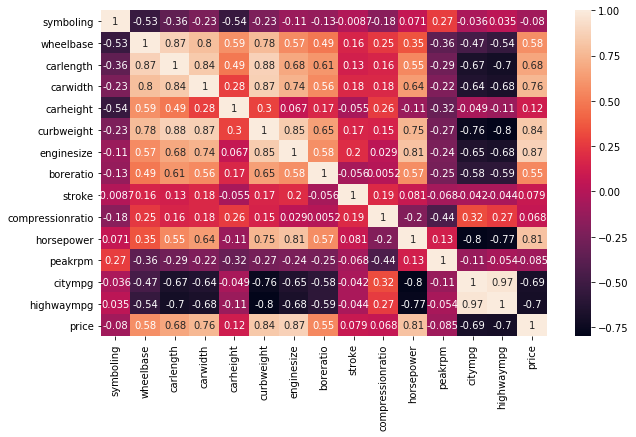

In [43]:
plt.figure(figsize = (10,6))
sns.heatmap(num_data.corr(),annot = True)

**Conclusion:** Similar conclusions could be drawn from the correlation plot.

**DATA WRANGLING**

In [273]:
CarName = [x.split(' ')[0] for x in cat_data['CarName']]
CarName = set(CarName)
CarName

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

Now there are 5 mistakes in the dataset, Now to correct them we apply the following user-defined function.

In [274]:
# Nissan
# mazda
# porsche
# toyota
# volkswagon
def spelling_corrector(name):
    if name[:2].lower() == 'ma':
        name = 'mazda'
        return name
    elif name[:2].lower() == 'po':
        name = 'porsche'
        return name
    elif name[:2].lower() == 'to':
        name = 'toyota'
        return name
    elif name[:3].lower() == 'vok':
        name = 'volkswagen'
        return name
    elif name[:2].lower() == 'ni':
        name = 'nissan'
        return name
    else:
        return name

In [275]:
cat_data['CarName'] = [spelling_corrector(name) for name in cat_data['CarName']]

C:\Users\2211583\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [276]:
cat_data['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [277]:
cat_data['CarName'] = [x.split(' ')[0] for x in cat_data['CarName']]

C:\Users\2211583\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
cat_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [279]:
len(cat_data['CarName'])

205

In [280]:
cat_data.head()

CarName fueltype aspiration doornumber      carbody drivewheel  \
0  alfa-romero      gas        std        two  convertible        rwd   
1  alfa-romero      gas        std        two  convertible        rwd   
2  alfa-romero      gas        std        two    hatchback        rwd   
3         audi      gas        std       four        sedan        fwd   
4         audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

**Conclusion:** 

We have successfully corrected the spelling in the column.

In [281]:
num_data.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

In [282]:
#checking for the unique values in the table where the data type is integer
dict_values = {}
for x in num_data.columns:
    dict_values[x] = num_data[x].nunique()
print(dict_values)

{'symboling': 6, 'wheelbase': 53, 'carlength': 75, 'carwidth': 44, 'carheight': 49, 'curbweight': 171, 'enginesize': 44, 'boreratio': 38, 'stroke': 37, 'compressionratio': 32, 'horsepower': 59, 'peakrpm': 23, 'citympg': 29, 'highwaympg': 30, 'price': 189}


**Conclusion:** Since the number of unique value is less for the column 'symboling'. I am converting it into a categorical data.

**Justification** Since symboling is a scale which has only six categories.It is fairly appropriate to convert it into a categorical variable.

**Defination**: Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Source: UCI Machine learning Library)

In [283]:
data['symboling'] = data['symboling'].astype('str')

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [285]:
#Dropping the Car ID column
data2 = data.drop(['car_ID'],axis = 1)
data2.head()

symboling                   CarName fueltype aspiration doornumber  \
0         3        alfa-romero giulia      gas        std        two   
1         3       alfa-romero stelvio      gas        std        two   
2         1  alfa-romero Quadrifoglio      gas        std        two   
3         2               audi 100 ls      gas        std       four   
4         2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [286]:
#dummy Coding

In [287]:
cat_data = pd.concat([cat_data,data['symboling']],axis = 1)
cat_data.head()

CarName fueltype aspiration doornumber      carbody drivewheel  \
0  alfa-romero      gas        std        two  convertible        rwd   
1  alfa-romero      gas        std        two  convertible        rwd   
2  alfa-romero      gas        std        two    hatchback        rwd   
3         audi      gas        std       four        sedan        fwd   
4         audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem symboling  
0          front       dohc           four       mpfi         3  
1          front       dohc           four       mpfi         3  
2          front       ohcv            six       mpfi         1  
3          front        ohc           four       mpfi         2  
4          front        ohc           five       mpfi         2

In [288]:
cat_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling'],
      dtype='object')

In [289]:
num_data.drop('symboling',axis= 1,inplace = True)

In [290]:
num_data.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [291]:
dummy_cat_data = pd.get_dummies(cat_data,columns = [x for x in cat_data.columns],drop_first = True)

In [292]:
dummy_cat_data.columns

Index(['CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'CarName_vw',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_

In [293]:
#Combining the data
final_data = pd.concat([num_data,dummy_cat_data],axis = 1)
final_data.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  fuelsystem_idi  \
0       3.47    2.68               9.0         111  ...               0   
1       3.47    2.68               9.0         111  ...               0   
2       2.68    3.47               9.0         154  ...               0   
3       3.19    3.40              10.0         102  ...               0   
4       3.19    3.40               8.0         115  ...               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   symboling_-2  symboling_0  symboling_1  symboling_2  symboling_3  
0             0            0            0            0            1  
1             0            0            0            0            1  
2             0            0            1            0            0  
3             0            0            0            1            0  
4             0            0            0            1            0  

[5 rows x 70 columns]

In [295]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  price                  205 non-null    float64
 14  CarName_audi           205 non-null    uint8  
 15  CarNam

**DIVIDING THE DATA INTO TEST AND TRAIN**

In [296]:
X,Y = final_data.drop('price',axis = 1),final_data['price']

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 101,test_size = 0.3)

In [299]:
X_train.shape,Y_train.shape

((143, 69), (143,))

In [300]:
X_test.shape,Y_test.shape

((62, 69), (62,))

**Standardizing the data**

To avoid data leakage, I split the data first and then do the standardization.

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 90 to 95
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              143 non-null    float64
 1   carlength              143 non-null    float64
 2   carwidth               143 non-null    float64
 3   carheight              143 non-null    float64
 4   curbweight             143 non-null    int64  
 5   enginesize             143 non-null    int64  
 6   boreratio              143 non-null    float64
 7   stroke                 143 non-null    float64
 8   compressionratio       143 non-null    float64
 9   horsepower             143 non-null    int64  
 10  peakrpm                143 non-null    int64  
 11  citympg                143 non-null    int64  
 12  highwaympg             143 non-null    int64  
 13  CarName_audi           143 non-null    uint8  
 14  CarName_bmw            143 non-null    uint8  
 15  CarNam

In [303]:
scaler = StandardScaler()

In [304]:
scaler.fit(X_train.loc[:,'wheelbase':'highwaympg'])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [305]:
X_train.loc[:,'wheelbase':'highwaympg'] = scaler.transform(X_train.loc[:,'wheelbase':'highwaympg'])
X_train.head()

C:\Users\2211583\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
90   -0.752908  -0.819705 -1.058131   0.312846   -1.121212   -0.631752   
33   -0.883096  -2.094809 -0.967170  -0.442041   -1.269008   -0.898243   
45   -0.752908  -1.603103 -1.149091  -0.680427   -1.328510   -0.946696   
188  -0.297248  -0.286329 -0.284967   0.789617   -0.578015   -0.486393   
203   1.623031   1.138787  1.261360   0.710155    1.182097    0.385760   

     boreratio    stroke  compressionratio  horsepower  ...  fuelsystem_idi  \
90   -1.441618  0.675408          2.777460   -1.279987  ...               1   
33   -1.753969  0.485750         -0.264517   -0.761255  ...               0   
45   -1.285443 -0.462540         -0.168707   -0.909464  ...               0   
188  -0.660742  0.454141         -0.072896   -0.168419  ...               0   
203  -1.363530  0.454141          3.040939   -0.020210  ...               1   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
90                0                0                0                0   
33                0                0                0                0   
45                0                0                0                0   
188               0                1                0                0   
203               0                0                0                0   

     symboling_-2  symboling_0  symboling_1  symboling_2  symboling_3  
90              0            0            1            0            0  
33              0            0            1            0            0  
45              0            1            0            0            0  
188             0            0            0            1            0  
203             0            0            0            0            0  

[5 rows x 69 columns]

In [306]:
X_test.loc[:,'wheelbase':'highwaympg'] = scaler.transform(X_test.loc[:,'wheelbase':'highwaympg'])
X_test.head()

C:\Users\2211583\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
120  -0.883096  -1.486426 -1.058131  -1.236659   -1.217184   -0.946696   
185  -0.297248  -0.286329 -0.284967   0.789617   -0.746925   -0.486393   
180   0.874448   1.055447  0.169835   0.153923    1.017027    1.015648   
119  -0.883096  -1.486426 -1.058131  -1.157198   -0.908156   -0.752884   
109   2.452982   1.980523  1.033959   1.981544    1.207050   -0.219902   

     boreratio    stroke  compressionratio  horsepower  ...  fuelsystem_idi  \
120  -1.519706 -0.083224         -0.216612   -0.958867  ...               0   
185  -0.660742  0.454141         -0.312422   -0.538942  ...               0   
180  -0.348391  0.296092         -0.264517    1.214864  ...               0   
119  -1.285443  0.422531         -0.647758   -0.119016  ...               0   
109   0.393442 -0.209663         -0.456137   -0.242524  ...               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
120               0                0                0                0   
185               0                1                0                0   
180               0                1                0                0   
119               0                0                1                0   
109               0                1                0                0   

     symboling_-2  symboling_0  symboling_1  symboling_2  symboling_3  
120             0            0            1            0            0  
185             0            0            0            1            0  
180             0            0            0            0            0  
119             0            0            1            0            0  
109             0            1            0            0            0  

[5 rows x 69 columns]

**Building a decision Tree model**

In [397]:
from sklearn.tree import DecisionTreeRegressor
#Selecting the best parameters using Grid Search
from sklearn.model_selection import GridSearchCV

In [398]:
param_grid = {'max_depth': [4,5,6,7]}

In [399]:
DT_model = DecisionTreeRegressor(random_state = 23)

In [400]:
grid = GridSearchCV(DT_model,param_grid)

In [401]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=23, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [402]:
grid.best_params_

{'max_depth': 6}

In [403]:
#Selecting the best parameter using Grid Search
model_tree = DecisionTreeRegressor(max_depth = 6)

In [404]:
model_tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [405]:
predicted = model_tree.predict(X_test)

In [406]:
model_tree.score(X_test,predicted)

1.0

In [407]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [408]:
MAE = sum(abs((Y_test-predicted)/Y_test))*100
MAE

899.0812530703703

In [409]:
print('\n')
print('      MODEL EVALUATION FOR THE DECISION TREE')
print('\n')
print('The Mean Absolute Error is:            ', round(mean_absolute_error(Y_test,predicted),4))
print('The Mean Absolute Percentage Error is: ', round(MAE,4))
print('The Mean Squared Error is:             ', round(mean_squared_error(Y_test,predicted),4))
print('The Root Mean Error is:                ', round(np.sqrt(mean_squared_error(Y_test,predicted)),4))
print('The R2 Score is:                       ', round(r2_score(Y_test,predicted),4))



      MODEL EVALUATION FOR THE DECISION TREE


The Mean Absolute Error is:             1894.5352
The Mean Absolute Percentage Error is:  899.0813
The Mean Squared Error is:              8091458.3876
The Root Mean Error is:                 2844.5489
The R2 Score is:                        0.8816


**Building a Random Forest model**

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [350]:
#Selecting the best parameters using Grid Search
from sklearn.model_selection import GridSearchCV

In [410]:
model_tree = RandomForestRegressor(random_state = 23)

In [411]:
param_grid = {'n_estimators': [75,100,150,200,250,300],'max_depth': [6,7,8,9,10]}

In [412]:
grid = GridSearchCV(model_tree,param_grid)

In [413]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=23,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [414]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 75}

In [415]:
#Using the best parameter for the fitting
Random_Forest_model = RandomForestRegressor(n_estimators = 75,max_depth = 9,random_state = 75)

In [416]:
Random_Forest_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=75, verbose=0, warm_start=False)

In [417]:
pred = Random_Forest_model.predict(X_test)

In [418]:
Random_Forest_model.score(X_test,pred)

1.0

In [419]:
MAE = sum(abs((Y_test-pred)/Y_test))*100
MAE

780.1582289364459

In [420]:
print('\n')
print('      MODEL EVALUATION FOR THE RANDOM FOREST')
print('\n')
print('The Mean Absolute Error is:            ', round(mean_absolute_error(Y_test,pred),4))
print('The Mean Absolute Percentage Error is: ', round(MAE,4))
print('The Mean Squared Error is:             ', round(mean_squared_error(Y_test,pred),4))
print('The Root Mean Error is:                ', round(np.sqrt(mean_squared_error(Y_test,pred)),4))
print('The R2 Score is:                       ', round(r2_score(Y_test,pred),4))



      MODEL EVALUATION FOR THE RANDOM FOREST


The Mean Absolute Error is:             1589.843
The Mean Absolute Percentage Error is:  780.1582
The Mean Squared Error is:              5578893.7483
The Root Mean Error is:                 2361.9682
The R2 Score is:                        0.9183


**CONCLUSION:**

Since the Random Forest is performing better interms of all the metrics, Random Forest will be used for predicting the price of the cars.

What could be done:
1. Considering the 'Symbolist' Column as discrete only.
2. Use of other HyperPrameters for the modeling.